###### 1. Data Preprocessing

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
df = pd.read_csv("cpa.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [53]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [55]:
#as income fiels has veryy less null values so dropping those Null values
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [56]:
df.drop(['ID'],axis=1,inplace =True)

C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
# Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

Number of categorical variables:  3


###### Feature Enginnering
There is a lot of information given in the dataset related to the customers. In some cases we can group some columns together to create new features and in some cases we can create new columns based on the existing one's to create new features. This would help to better explore the data and draw meaningful insights from it.

In [58]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
-----------------------------------------------
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
13-03-2014     1
22-04-2014     1
13-08-2013     1
19-04-2013     1
09-06-2013     1
Name: Dt_Customer, Length: 662, dtype: int64
-----------------------------------------------


In [59]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                               'Married': 'Partner',
                                                'Divorced': 'Single',
                                                'Widow': 'Single', 
                                                'Alone': 'Single',
                                                'Absurd': 'Single',
                                                'YOLO': 'Single'})

C:\Users\Personal\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
#Forming New Catagories
df.Marital_Status = df.Marital_Status.replace({'Basic':'Secondary',
                  '2n Cycle':'Graduation',
                     'Master':'Higher education',
                     'PhD':'Higher education',
                     'Graduation':'Graduation'})

In [61]:
# Checking unique values from Categorical Columns

for feature in categorical_features:
    #print(feature,'\n')
    print(df[feature].value_counts())
    print('-----------------------------------------------')

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
-----------------------------------------------
Partner    1430
Single      786
Name: Marital_Status, dtype: int64
-----------------------------------------------
31-08-2012    12
12-05-2014    11
12-09-2012    11
14-02-2013    11
22-05-2014    10
              ..
13-03-2014     1
22-04-2014     1
13-08-2013     1
19-04-2013     1
09-06-2013     1
Name: Dt_Customer, Length: 662, dtype: int64
-----------------------------------------------


Converted education and married status records in new groups as shown above. as
1. 2nd cycle and graduation comes in one category
2. Master and PHD comes in Higher education
marital staus also formed in gruop as
1. single,divorced,Alone, widow comed under Single group
2. married,togahter comes under married group
3. YOLO and Absurd comes in new catagory

Total Children
Informationis given separately for kids and teens at home for every customers.  so combining these two columns to reduce columns

In [62]:

tot_children=df['Kidhome']+df['Teenhome']
df['tot_children']=tot_children
df

<ipython-input-62-0494de570345>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Partner,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,1
2236,1946,PhD,Partner,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,3
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,0
2238,1956,Master,Partner,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,1


In [63]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
tot_children           0
dtype: int64

In [64]:
#Dropping two columns as repeteation of information
data=df.copy()
data=data.drop(['Kidhome','Teenhome'],axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,0
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,2
2,1965,Graduation,Partner,71613.0,21-08-2013,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,0
3,1984,Graduation,Partner,26646.0,10-02-2014,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,1
4,1981,PhD,Partner,58293.0,19-01-2014,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,1


#calculating age of customer at the time of customer enrollment

In [65]:
data['Dt_Customer'] = data['Dt_Customer'].astype('datetime64')
#data['Date_Customer'] = data['Dt_Customer'].dt.day.astype('int64')
#data['Month_Customer'] = data['Dt_Customer'].dt.month.astype('int64')
data['Year_Customer'] = data['Dt_Customer'].dt.year
age=data['Year_Customer'] - data['Year_Birth']
data['age']=age
data.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,tot_children,Year_Customer,age
0,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,0,3,11,1,0,2012,55
1,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,3,11,0,2,2014,60
2,1965,Graduation,Partner,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,3,11,0,0,2013,48
3,1984,Graduation,Partner,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,3,11,0,1,2014,30
4,1981,PhD,Partner,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,3,11,0,1,2014,33


In [66]:
data=data.drop(['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth'],axis=1)
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,tot_children,Year_Customer,age
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,2012,55
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,2,2014,60
2,Graduation,Partner,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,0,2013,48
3,Graduation,Partner,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,2014,30
4,PhD,Partner,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,2014,33


Removing Outliers
There seems to be some outliers in the Age and Income columns. Let's check them.

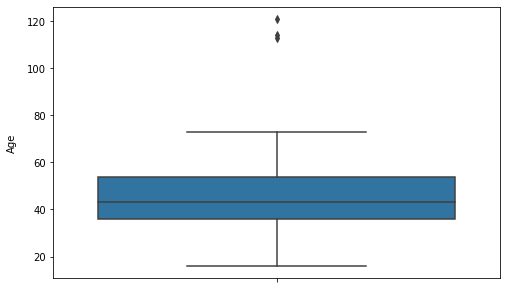

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data.age);
plt.ylabel('Age', fontsize=10, labelpad=10);

There are some customers aged above 100. This is rarely happend that age 100. Let's drop those customers from data

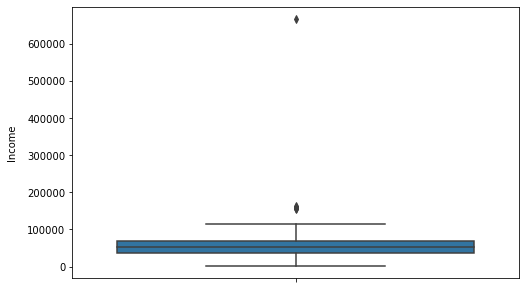

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data.Income);
plt.ylabel('Income', fontsize=10, labelpad=10);


There are some customers who are earning more than 1,20,000 and some of them even more than 600,000. very few records are there, so consider that they are clearly the outliers in the data, so we will leave them out

In [69]:
data= data[data.age < 100]
data= data[data.Income < 120000]

Total Expenses
The customer's Expenses are given separately for different products. Let's sum them up to calculate the total spendings of the customers

In [70]:
Products = [col for col in data.columns if 'Mnt' in col]
data['Expenses']=data[Products].sum(axis=1)

<AxesSubplot:xlabel='Income', ylabel='Count'>

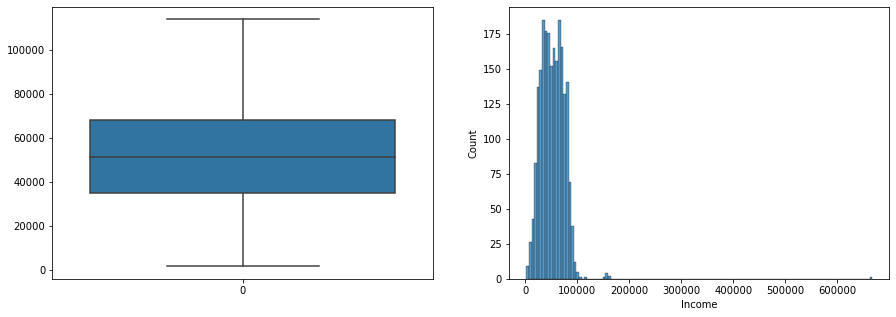

In [71]:
#check skewness of INcome to perform either mean or meadian to fill NaN valued
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = data['Income'])
plt.subplot(1,2,2)
sns.histplot(df['Income'])

In [72]:
#data['age']=data['age'].astype('int64')
#data.info()

###### 2.Exploratory Data Analysis(EDA)

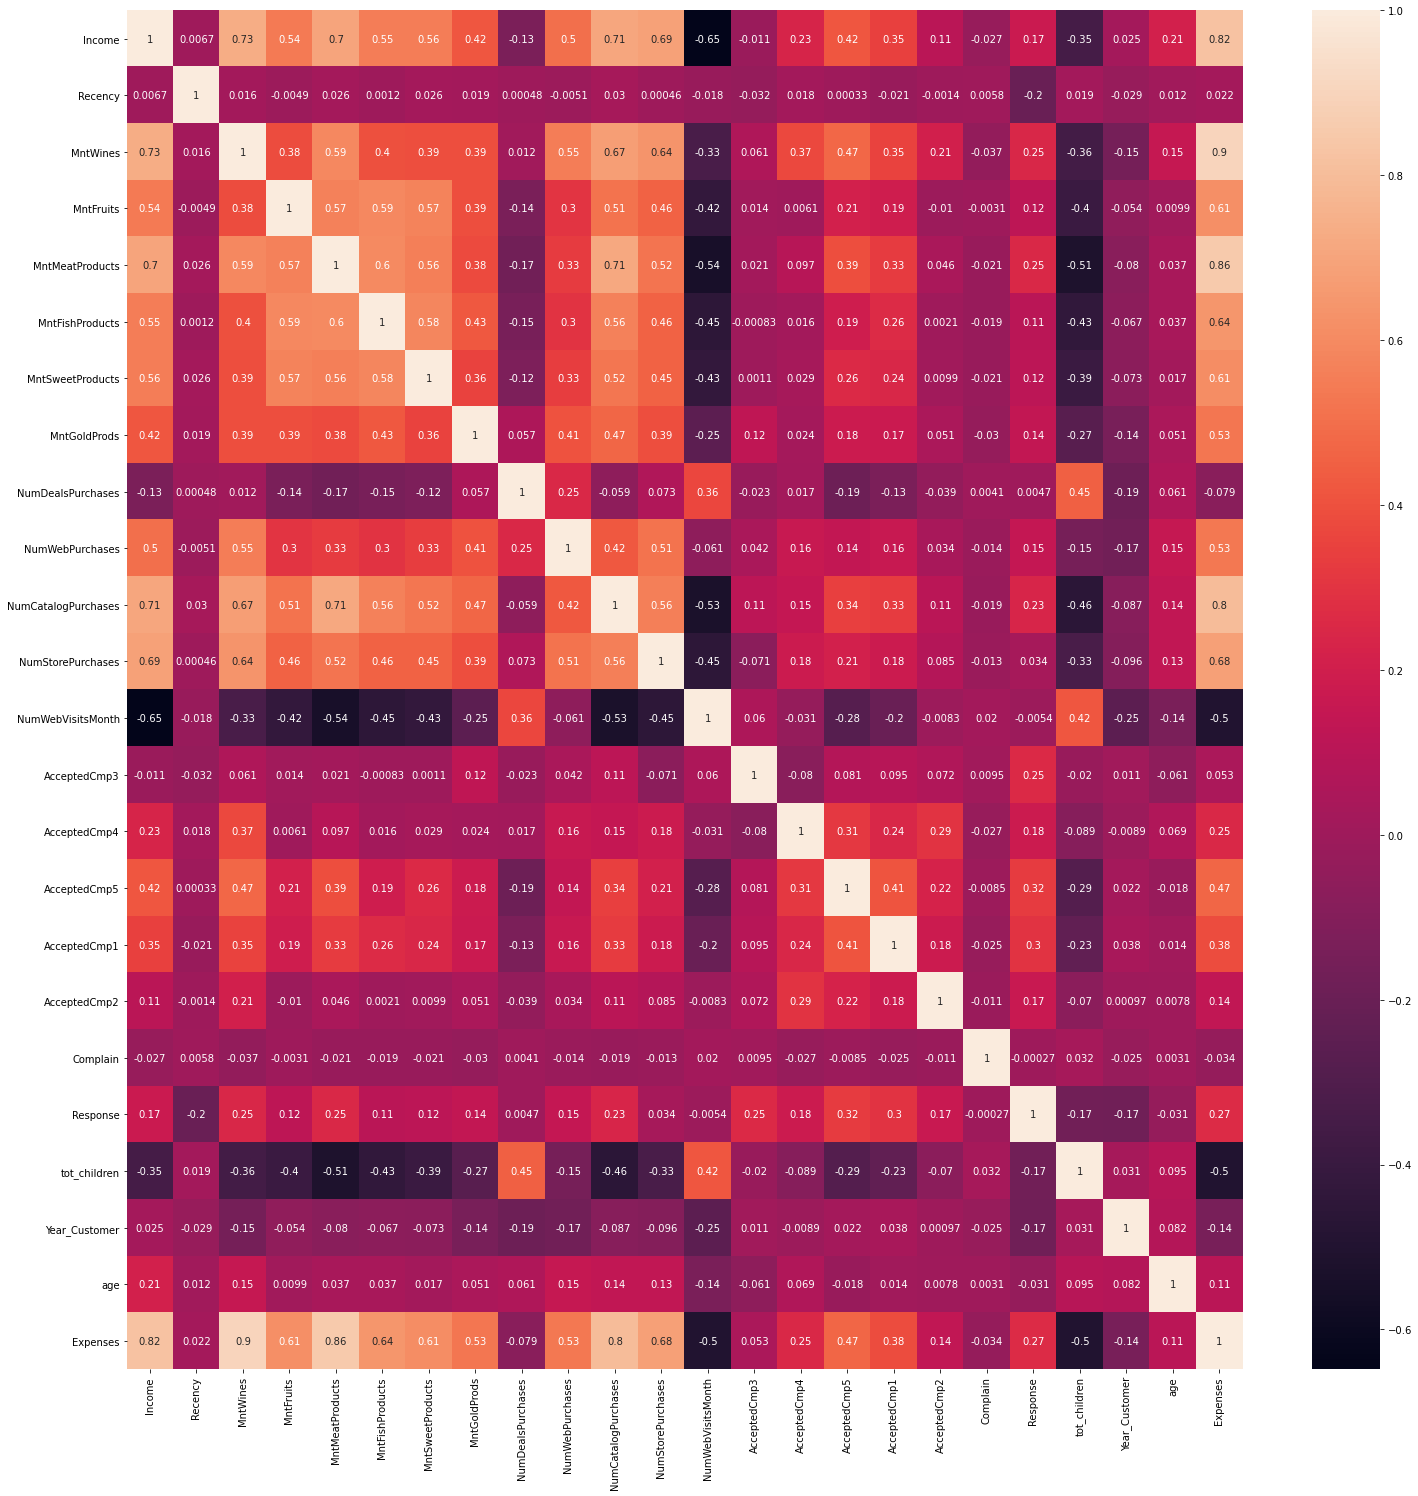

In [73]:
# heatmap for checking corelation between columns
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot=True)
plt.show()

###### This graph shows that, 
1.there is mnt features which are highly co-related with 'Income'. 
2.mntwine feature is highly co-related with numcatlog purchase feature. 
3. Income has a high negative correlation with "NumWebVisitsMonth" suggesting that customers with high income do not for web visits. 
4. Income has highly corelated with numcatlog purchase feature.

###### Marital status 

In [74]:
import plotly.express as px
maritalstatus = data.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 3)))
fig.show()

Average Expenses: Marital Status Wise

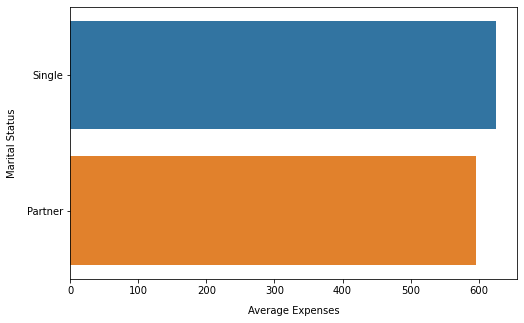

In [75]:
maritalspending = data.groupby('Marital_Status')['Expenses'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Expenses'])

plt.figure(figsize=(8,5))
sns.barplot(data = maritalspending_df, x="Average Expenses", y="Marital Status");

plt.xticks( fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Average Expenses', fontsize=10, labelpad=10)
plt.ylabel('Marital Status', fontsize=10, labelpad=10);

it states that single spends more than married

###### Average Expenses: Education Wise

<AxesSubplot:xlabel='Education', ylabel='Expenses'>

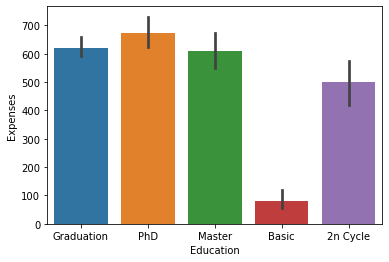

In [76]:
sns.barplot(x=data["Education"],y=data["Expenses"])

 Customers with PhD and Masters degree have slightly highest average income as compared to Graduatated customer.

###### Most Purchase Products

In [77]:
#Calculating Maximum amount spent on the products
Products = [col for col in data.columns if 'Mnt' in col]
Products_total = []
for i in range(0,6):
  print("{} = ${}".format(Products[i],data[Products[i]].sum(axis=0)))
  Products_total.append(data[Products[i]].sum(axis=0))

MntWines = $675093
MntFruits = $58219
MntMeatProducts = $364513
MntFishProducts = $83253
MntSweetProducts = $59818
MntGoldProds = $97146


<AxesSubplot:>

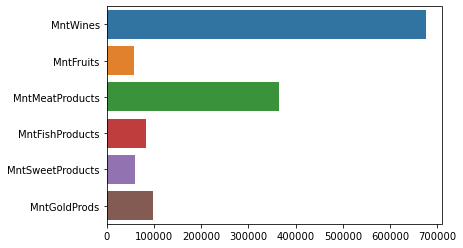

In [78]:
sns.barplot(x=Products_total, y=Products)

we can see from above graph, maximum amount spent on the mnt wines product and then on the mn meat product.

###### Popular sources to purchase products

In [79]:
#Calculating total of sources of products
sources=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
sources_total = []
for i in range(0,4):
  print("{} = {}".format(sources[i],data[sources[i]].sum(axis=0)))
  sources_total.append(data[sources[i]].sum(axis=0))

NumDealsPurchases = 5112
NumWebPurchases = 9042
NumCatalogPurchases = 5833
NumStorePurchases = 12841


<AxesSubplot:>

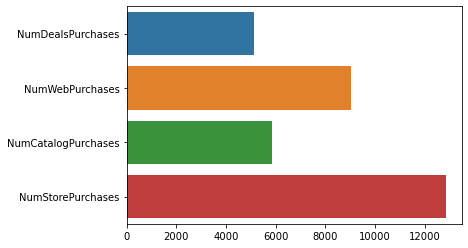

In [80]:
sns.barplot(x=sources_total, y=sources)

From above graph we can see that maximum product purchased from store source and then from web source.

###### Age wise Expenses

In [81]:
data.loc[(data['age'] >= 13) & (data['age'] <= 19), 'AgeGroup'] = 'Teen'
data.loc[(data['age'] >= 20) & (data['age']<= 39), 'AgeGroup'] = 'Adult'
data.loc[(data['age'] >= 40) & (data['age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
data.loc[(data['age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [82]:
#data['age'] = data['age'].apply(lambda x:'Senior_Citizen' if x >= 60 else 'Adult' if x > 25 else 'Youth')

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

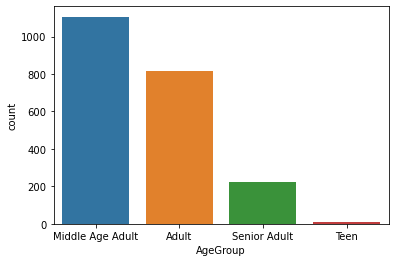

In [83]:
sns.countplot(x=data['AgeGroup'])

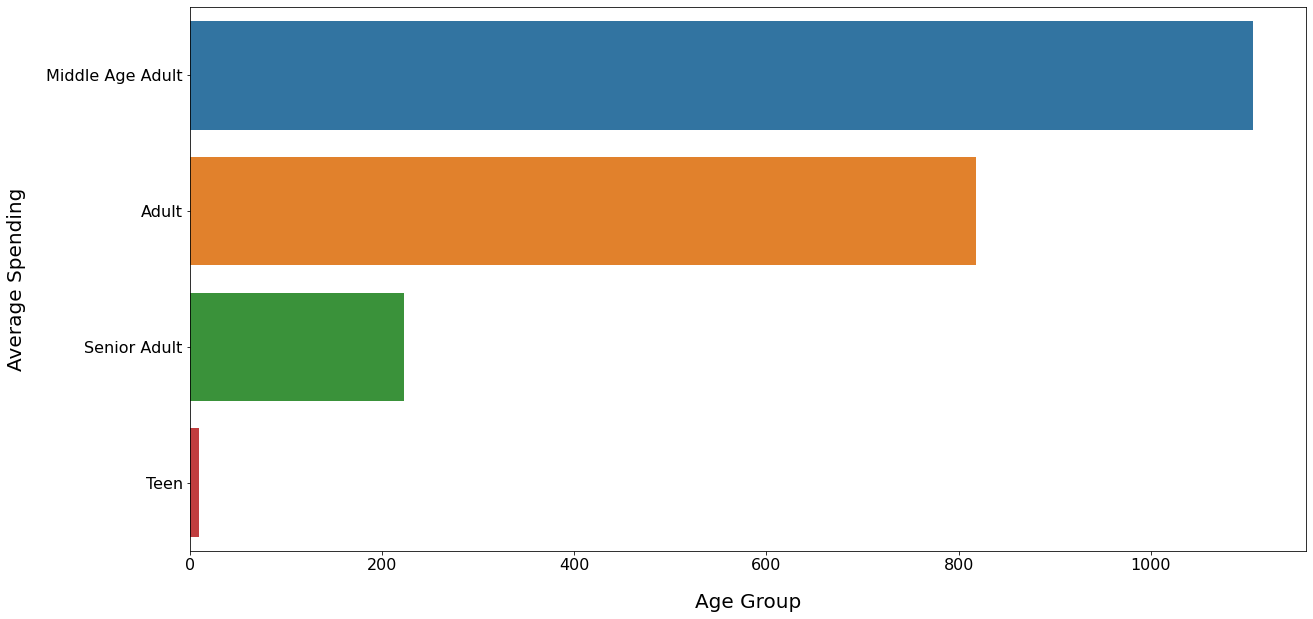

In [84]:
agegroup = data.AgeGroup.value_counts()
agegroupspending = data.groupby('AgeGroup')['Expenses'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Expenses'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Expenses", y='Age Group');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

from above graph, we can say the MiddleAge Adults have spent more amount on purches product than others.

In [85]:
###### Relationship: Income vs Expenses

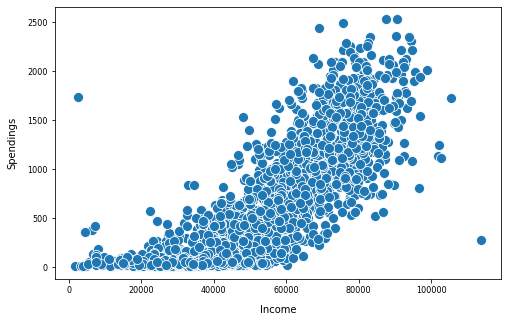

In [86]:
plt.figure(figsize=(8,5))


sns.scatterplot(x=data.Income, y=data.Expenses, s=100);

plt.xticks( fontsize=8)
plt.yticks( fontsize=8)
plt.xlabel('Income', fontsize=10, labelpad=10)
plt.ylabel('Spendings', fontsize=10, labelpad=10);

The relationship is linear. Customers having higher salaries are spending more

In [87]:
data.to_csv("C:/Users/Personal/Desktop/MDLP1/CPA project//data.csv", index=False)

refernces for feature engineering https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114